In [19]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# data
file_taxi_january = 'yellow_tripdata_2023-01.parquet'
file_taxi_february = 'yellow_tripdata_2023-02.parquet'

In [3]:


# create a dataframe
df = pd.read_parquet(file_taxi_january, engine='pyarrow')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [9]:
df.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0,0 days 00:08:26


In [13]:
# How to convert the difference from date time to minutes (example)
time_delta = df.duration.iloc[0]
print(time_delta)
print(time_delta.total_seconds() / 60)

0 days 00:08:26
8.433333333333334


In [17]:
# Create a new column that represents the trip duration in minutes instead of data_time objs
df['duration_minutes'] = df.duration.apply(lambda x: x.total_seconds() / 60)
df.duration_minutes.head(2)

0    8.433333
1    6.316667
Name: duration_minutes, dtype: float64

/tmp/ipykernel_9741/2277739658.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration_minutes)


<Axes: xlabel='duration_minutes', ylabel='Density'>

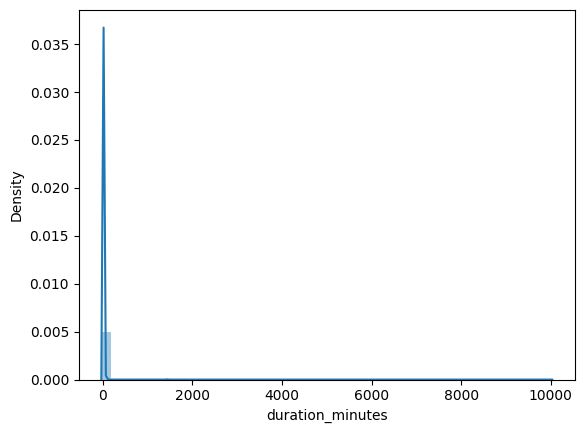

In [23]:
# visualize the distribution of trips duration
#sns.histplot(df.duration_minutes)
sns.distplot(df.duration_minutes)

In [48]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df['duration_minutes'].describe(percentiles=[0.95, 0.98, 0.998]))

count   3066766
mean         16
std          43
min         -29
50%          12
95%          36
98%          49
99.8%        79
max       10029
Name: duration_minutes, dtype: float64


In [29]:
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df['duration_minutes'].describe(percentiles=[0.01, 0.05, 0.1]))

count   3066766
mean         16
std          43
min         -29
1%            1
5%            3
10%           4
50%          12
max       10029
Name: duration_minutes, dtype: float64


In [49]:
# lets filter out the outliers
df2 = df[(df.duration_minutes >= 1) & (df.duration_minutes <= 79)]

In [50]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_minutes
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


/tmp/ipykernel_9741/2669902950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.duration_minutes)


<Axes: xlabel='duration_minutes', ylabel='Density'>

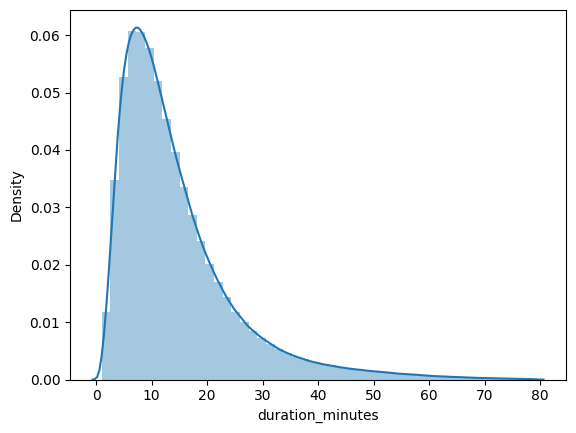

In [51]:
sns.distplot(df2.duration_minutes)